<a href="https://colab.research.google.com/github/cbcummings/book_fastai_pytorch/blob/main/02_production_cbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 727kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 33.5MB/s 
     |████████████████████████████████| 194kB 44.2MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 


In [ ]:
!pip install -q fastai --upgrade

In [ ]:
from fastbook import *
from fastai.vision.all import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY', '0b9f5bba0b274ed38bea1b793ad0b8b9')

In [ ]:
results = search_images_bing(key, 'grizzly bear')

In [ ]:
ims = results.attrgot('contentUrl')
len(ims)

150

In [ ]:
temp_path = Path('images')
temp_path.mkdir()

In [ ]:
dest = (temp_path/'grizzly.jpg')
download_url(ims[0], dest)

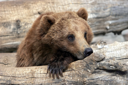

In [ ]:
temp_im = Image.open(dest)
temp_im.to_thumb(128, 128)

In [ ]:
bear_types = 'grizzly','black','teddy'
type(bear_types)

tuple

In [ ]:
path = Path('bears')

In [ ]:
if not path.exists():
  path.mkdir()

In [ ]:
for o in bear_types:
  dest = (path/o)
  dest.mkdir(exist_ok=True)
  results = search_images_bing(key, f'{o} bear')
  download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

(#387) [Path('bears/grizzly/00000023.jpg'),Path('bears/grizzly/00000147.jpg'),Path('bears/grizzly/00000113.png'),Path('bears/grizzly/00000037.jpeg'),Path('bears/grizzly/00000059.png'),Path('bears/grizzly/00000085.jpg'),Path('bears/grizzly/00000056.jpg'),Path('bears/grizzly/00000064.jpg'),Path('bears/grizzly/00000038.jpg'),Path('bears/grizzly/00000123.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#7) [Path('bears/grizzly/00000113.png'),Path('bears/teddy/00000134.jpg'),Path('bears/teddy/00000110.jpg'),Path('bears/teddy/00000032.jpg'),Path('bears/teddy/00000012.jpg'),Path('bears/black/00000029.jpg'),Path('bears/black/00000003.png')]

In [ ]:
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

In [ ]:
fns

(#387) [Path('bears/grizzly/00000023.jpg'),Path('bears/grizzly/00000147.jpg'),Path('bears/grizzly/00000113.png'),Path('bears/grizzly/00000037.jpeg'),Path('bears/grizzly/00000059.png'),Path('bears/grizzly/00000085.jpg'),Path('bears/grizzly/00000056.jpg'),Path('bears/grizzly/00000064.jpg'),Path('bears/grizzly/00000038.jpg'),Path('bears/grizzly/00000123.jpg')...]

In [ ]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [ ]:
dls = bears.dataloaders(path)

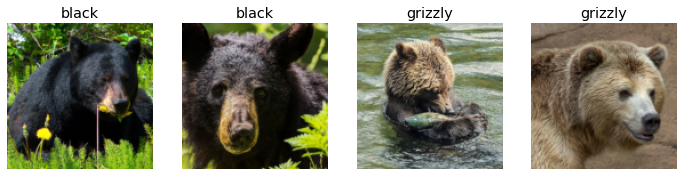

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.662117,0.255162,0.118421,00:19


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.251095,0.057762,0.026316,00:19
1,0.174099,0.023617,0.013158,00:19
2,0.139910,0.024722,0.013158,00:20
3,0.116112,0.024629,0.013158,00:19


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

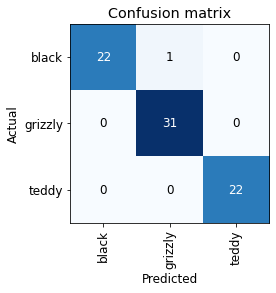

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

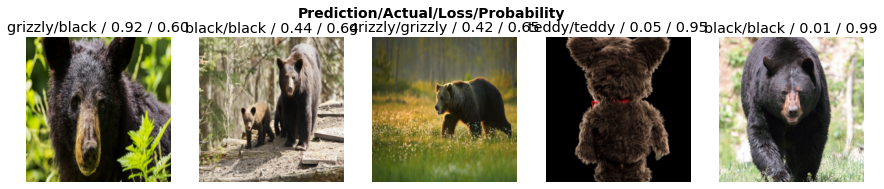

In [ ]:
interp.plot_top_losses(5, nrows=1)